<a href="https://colab.research.google.com/github/Diyon335/PRA3024/blob/master/Week2_Chad/Week2_Chad_Exoplanets_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Diyon Wickremeratne\
**Student ID:** i6176139
## **Task 1: Investigating the light curves of two chosen planets**

*   ### **Planet 1: HD 1397 b**
*   ### **Planet 2: pi Men c**

In [0]:
#Import the required libraries 
import numpy as np
import requests
import matplotlib.pyplot as plt
import pandas as p
from IPython.display import display, HTML

%matplotlib inline
#This initialises the parameters of the request method used later
planeturl = "https://exo.mast.stsci.edu/api/v0.1/exoplanets/"
dvurl = "https://exo.mast.stsci.edu/api/v0.1/dvdata/tess/"
header={}

The block below gives a .json file with each planet's identifiers 

In [0]:
planet_1 = "HD 1397 b"
planet_2 = "pi Men c"

url = planeturl + "/identifiers/"

myparams_1 = {"name":planet_1}
myparams_2 = {"name":planet_2}
#We request the data from each planet's catalogue
r_1 = requests.get(url = url, params = myparams_1, headers = header)
r_2 = requests.get(url = url, params = myparams_2, headers = header)
print(r_1.headers.get('content-type'))
print(r_2.headers.get('content-type'))

application/json; charset=UTF-8
application/json; charset=UTF-8


In [0]:
planet_names_1 = r_1.json()
planet_names_2 = r_2.json()
#The dictionary for HD 1397 b
ticid = planet_names_1['tessID']
tce = planet_names_1['tessTCE']
planet_names_1

{'canonicalName': 'HD 1397 b',
 'dec': -66.35891,
 'keplerID': None,
 'keplerTCE': None,
 'planetNames': [],
 'ra': 4.446472,
 'starName': 'HD 1397',
 'tessID': 394137592,
 'tessTCE': None}

In [0]:
#The dictionary for pi Men c
ticid = planet_names_2['tessID']
tce = planet_names_2['tessTCE']
planet_names_2
#print(ticid)

{'canonicalName': 'pi Men c',
 'dec': -80.469124,
 'keplerID': None,
 'keplerTCE': None,
 'planetNames': [],
 'ra': 84.291214,
 'starName': 'HD 39091',
 'tessID': 261136679,
 'tessTCE': 'TCE_1'}

In [0]:
#Now we get the properties of the planets
url_1 = planeturl + planet_1 + "/properties/"
url_2 = planeturl + planet_2 + "/properties/"

r_1 = requests.get(url = url_1, headers = header)
r_2 = requests.get(url = url_2, headers = header)

planet_prop_1 = r_1.json()
planet_prop_2 = r_2.json()

print("Catalog 1: " + planet_prop_1[0]['catalog_name'])
planet_prop_1[0].keys()


Catalog 1: nexsci


dict_keys(['canonical_name', 'exoplanetID', 'catalog_name', 'planet_name', 'disposition', 'modified_date', 'star_name', 'component', 'Rs', 'Rs_unit', 'Rs_upper', 'Rs_lower', 'Rs_ref', 'Rs_url', 'Ms', 'Ms_unit', 'Ms_upper', 'Ms_lower', 'Ms_ref', 'Ms_url', 'Fe/H', 'Fe/H_upper', 'Fe/H_lower', 'Fe/H_ref', 'Fe/H_url', 'stellar_gravity', 'stellar_gravity_upper', 'stellar_gravity_lower', 'stellar_gravity_ref', 'stellar_gravity_url', 'Teff', 'Teff_unit', 'Teff_upper', 'Teff_lower', 'Teff_ref', 'Teff_url', 'Vmag', 'Vmag_unit', 'Vmag_upper', 'Vmag_lower', 'Vmag_ref', 'Vmag_url', 'Jmag', 'Jmag_unit', 'Jmag_upper', 'Jmag_lower', 'Jmag_ref', 'Jmag_url', 'Hmag', 'Hmag_unit', 'Hmag_upper', 'Hmag_lower', 'Hmag_ref', 'Hmag_url', 'Kmag', 'Kmag_unit', 'Kmag_upper', 'Kmag_lower', 'Kmag_ref', 'Kmag_url', 'RA', 'DEC', 'distance', 'distance_unit', 'distance_upper', 'distance_lower', 'distance_ref', 'distance_url', 'Rp', 'Rp_unit', 'Rp_upper', 'Rp_lower', 'Rp_ref', 'Rp_url', 'Mp', 'Mp_unit', 'Mp_upper', 'Mp_l

In [0]:
print("Catalog 1: " + planet_prop_2[0]['catalog_name'])
planet_prop_2[0].keys()


Catalog 1: nexsci


dict_keys(['canonical_name', 'exoplanetID', 'catalog_name', 'planet_name', 'disposition', 'modified_date', 'star_name', 'component', 'Rs', 'Rs_unit', 'Rs_upper', 'Rs_lower', 'Rs_ref', 'Rs_url', 'Ms', 'Ms_unit', 'Ms_upper', 'Ms_lower', 'Ms_ref', 'Ms_url', 'Fe/H', 'Fe/H_upper', 'Fe/H_lower', 'Fe/H_ref', 'Fe/H_url', 'stellar_gravity', 'stellar_gravity_upper', 'stellar_gravity_lower', 'stellar_gravity_ref', 'stellar_gravity_url', 'Teff', 'Teff_unit', 'Teff_upper', 'Teff_lower', 'Teff_ref', 'Teff_url', 'Vmag', 'Vmag_unit', 'Vmag_upper', 'Vmag_lower', 'Vmag_ref', 'Vmag_url', 'Jmag', 'Jmag_unit', 'Jmag_upper', 'Jmag_lower', 'Jmag_ref', 'Jmag_url', 'Hmag', 'Hmag_unit', 'Hmag_upper', 'Hmag_lower', 'Hmag_ref', 'Hmag_url', 'Kmag', 'Kmag_unit', 'Kmag_upper', 'Kmag_lower', 'Kmag_ref', 'Kmag_url', 'RA', 'DEC', 'distance', 'distance_unit', 'distance_upper', 'distance_lower', 'distance_ref', 'distance_url', 'Rp', 'Rp_unit', 'Rp_upper', 'Rp_lower', 'Rp_ref', 'Rp_url', 'Mp', 'Mp_unit', 'Mp_upper', 'Mp_l

Here are the properties of HD 1397 b

In [0]:
print("HD 1397 b Properties")
print("Stellar Mass %f %s" % (planet_prop_1[0]['Ms'], planet_prop_1[0]['Ms_unit'] ) )
print("Planet Mass %f %s" % (planet_prop_1[0]['Mp'], planet_prop_1[0]['Mp_unit'] ) )
print("Planet Mass Reference: %s" % (planet_prop_1[0]['Mp_ref']))

HD 1397 b Properties
Stellar Mass 1.320000 M_sun
Planet Mass 0.415000 M_Jupiter
Planet Mass Reference: Nielsen et al. 2019


Here are the properties of pi Men c

In [0]:
print("pi Men c Properties")
print("Stellar Mass %f %s" % (planet_prop_2[0]['Ms'], planet_prop_2[0]['Ms_unit'] ) )
print("Planet Mass %f %s" % (planet_prop_2[0]['Mp'], planet_prop_2[0]['Mp_unit'] ) )
print("Planet Mass Reference: %s" % (planet_prop_2[0]['Mp_ref']))

pi Men c Properties
Stellar Mass 1.090000 M_sun
Planet Mass 0.015170 M_Jupiter
Planet Mass Reference: Huang et al. 2018


Let's focus on HD 1397's Light curve:

In [0]:
ticid = 394137592
url_1 = dvurl + str(ticid) + '/tces/'
param1 = {"tce" : tce}

r1 = requests.get(url = url_1, params = param1, headers = header)
sectorInfo = r1.json()

sectors = [x[:11] for x in sectorInfo["TCE"] if tce in x]
sectors

['s0001-s0001']

In [0]:
url_1 = dvurl + str(ticid) + '/info/'
param1 = {"tce" : tce,
            "sector" : sectors[0]}

r1 = requests.get(url = url_1, params = param1, headers = header)
tceInfo = r1.json()
tceInfo.keys()
tceInfo['DV Data Header'].keys()

print("TIC: %s" % tceInfo['DV Primary Header']['OBJECT'])
print("Planet Radius: %f" % tceInfo['DV Data Header']['PRADIUS'])

TIC: TIC 394137592
Planet Radius: 12.158234


In [0]:
url = dvurl + str(ticid) + '/table/'
param1 = {"tce" : tce,
            "sector" : sectors[0]}

r1 = requests.get(url = url, params = param1, headers = header)
tce_data = r1.json()

data = p.DataFrame.from_dict(tce_data['data'])
data.columns

Index(['TICID', 'EXTNAME', 'TIME', 'TIMECORR', 'CADENCENO', 'PHASE', 'LC_INIT',
       'LC_INIT_ERR', 'LC_WHITE', 'LC_DETREND', 'MODEL_INIT', 'MODEL_WHITE',
       'DATE_OBS', 'TESSDatetime', 'SECTORS'],
      dtype='object')

Text(0, 0.5, 'Relative Flux')

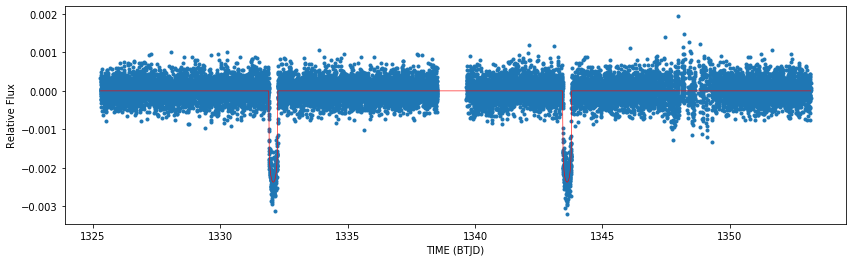

In [0]:
detrend = data['LC_DETREND']
model = data['MODEL_INIT']
time = data['TIME']

plt.figure(figsize=(14,4))
plt.plot(time,detrend,'.',lw=0.4)
plt.plot(time,model,'r-',lw=0.6)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Relative Flux')

In [0]:
url = dvurl + str(ticid) + '/phaseplot/'
param1 = {"tce" : tce,
            "sector" : sectors[0]}

r1 = requests.get(url = url, params = param1, headers = header)

display(HTML(str(r1.content.decode('utf-8'))))

And now for pi Men c's Light Curve:

In [0]:
newticid = 261136679
url_2 = dvurl + str(newticid) + '/tces/'
param2 = {"tce" : tce}

r2 = requests.get(url = url_2, params = param2, headers = header)
sectorInfo = r2.json()

sectors = [x[:11] for x in sectorInfo["TCE"] if tce in x]
sectors

['s0013-s0013',
 's0008-s0008',
 's0001-s0001',
 's0012-s0012',
 's0011-s0011',
 's0001-s0006',
 's0001-s0009',
 's0004-s0004',
 's0001-s0013']

In [0]:
url_2 = dvurl + str(newticid) + '/info/'
param2 = {"tce" : tce,
            "sector" : sectors[0]}

r2 = requests.get(url = url_2, params = param2, headers = header)
tceInfo = r2.json()
tceInfo.keys()
tceInfo['DV Data Header'].keys()

print("TIC: %s" % tceInfo['DV Primary Header']['OBJECT'])
print("Planet Radius: %f" % tceInfo['DV Data Header']['PRADIUS'])

TIC: TIC 261136679
Planet Radius: 1.814213


In [0]:
url = dvurl + str(newticid) + '/table/'
param2 = {"tce" : tce,
            "sector" : sectors[0]}

r2 = requests.get(url = url, params = param2, headers = header)
tce_data = r2.json()

data = p.DataFrame.from_dict(tce_data['data'])
data.columns

Index(['TICID', 'EXTNAME', 'TIME', 'TIMECORR', 'CADENCENO', 'PHASE', 'LC_INIT',
       'LC_INIT_ERR', 'LC_WHITE', 'LC_DETREND', 'MODEL_INIT', 'MODEL_WHITE',
       'DATE_OBS', 'TESSDatetime', 'SECTORS'],
      dtype='object')

Text(0, 0.5, 'Relative Flux')

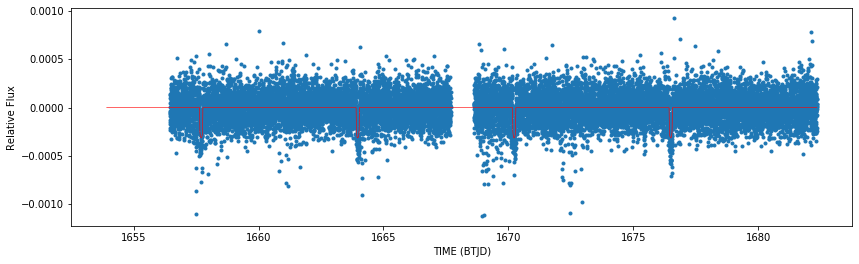

In [0]:
detrend = data['LC_DETREND']
model = data['MODEL_INIT']
time = data['TIME']

plt.figure(figsize=(14,4))
plt.plot(time,detrend,'.',lw=0.4)
plt.plot(time,model,'r-',lw=0.6)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Relative Flux')

In [0]:
url = dvurl + str(newticid) + '/phaseplot/'
param2 = {"tce" : tce,
            "sector" : sectors[0]}

r2 = requests.get(url = url, params = param2, headers = header)

display(HTML(str(r2.content.decode('utf-8'))))

The light curves seem to display the properties obtained in the keys of each planet's dictionary. The most notable being how much relative flux each planet blocks off due to their size. The HD 1397, with a planet radius of around 12 times the radius of the Sun blocks off more light than pi Men c, whose radius is of only 1.2 times the radius of the sun. 

## **Task 2: Plotting a Flux curve of a planet/star**

TCID of Chosen planet/star: 724151530

Install astroquery in order to use some of its methods

In [0]:
!pip install astroquery

In [0]:
import numpy as np
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
ticid = 410214986

starName = "TIC " + str(ticid)
radSearch = 4/60 #radius in degrees

catalogData = Catalogs.query_object(starName, radius = radSearch, catalog = "TIC")
ra = catalogData[0]['ra']
dec = catalogData[0]['dec']

# Print out the first row in the table
print( catalogData[:5]['ID', 'Tmag', 'Jmag', 'ra', 'dec', 'objType'] )

    ID       Tmag   Jmag        ra               dec        objType
---------- ------- ----- ---------------- ----------------- -------
 410214986  7.8541 7.122 354.914504004534  -69.195752595235    STAR
 410214984  8.7568  7.63 354.913624788909 -69.1943041563466    STAR
2054837507 18.6234   nan 354.911785410185 -69.1981581230906    STAR
2054837508 19.4619   nan 354.893602966012 -69.1944933347191    STAR
2054837500  18.515   nan  354.94348226655 -69.2012018840914    STAR


In [0]:
# Create a list of nearby bright stars (tess magnitude less than 14) from the rest of the data for later.
bright = catalogData['Tmag'] < 15

# Make it a list of Ra, Dec pairs of the bright ones. This is now a list of nearby bright stars.
nearbyStars = list( map( lambda x,y:[x,y], catalogData[bright]['ra'], catalogData[bright]['dec'] ) )
len(nearbyStars)

7

In [0]:
coord = SkyCoord(ra, dec, unit = "deg")

sectorTable = Tesscut.get_sectors(coord)
print(sectorTable)

  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0001-3-2      1      3   2


In [0]:
hdulist = Tesscut.get_cutouts(coord, 20)
hdulist[0].info()
hdulist[0][0].header['SECTOR']

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  PIXELS        1 BinTableHDU    279   1282R x 12C   [D, E, J, 400J, 400E, 400E, 400E, 400E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        79   (20, 20)   int32   


1

In [0]:
# Define a function to simplify the plotting command that we do repeatedly.
def plot_cutout(image):
    """
    Plot image and add grid lines.
    """
    plt.imshow(image, origin = 'lower', cmap = plt.cm.YlGnBu_r, 
           vmax = np.percentile(image, 92),
           vmin = np.percentile(image, 5))

    plt.grid(axis = 'both',color = 'white', ls = 'solid')

Text(0, 0.5, 'Image Row')

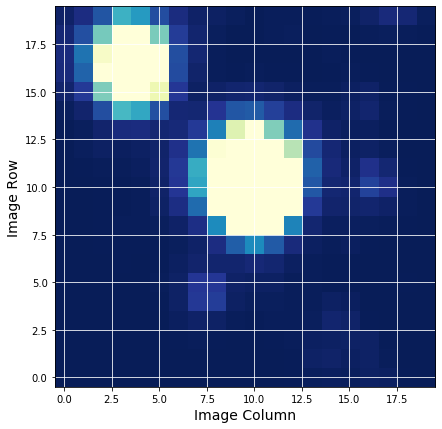

In [0]:
hdu1 = hdulist[0]
firstImage = hdu1[1].data['FLUX'][0]

fig = plt.figure(figsize=(7, 7))
plot_cutout(firstImage)
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)

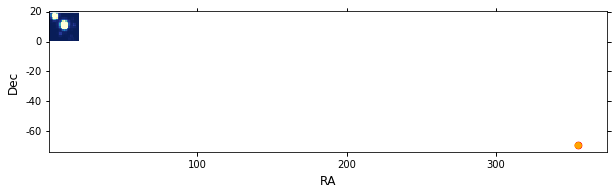

In [0]:
hdu2 = hdulist[0]

firstImage = hdu2[1].data['FLUX'][0]

wcs = WCS(hdu2[0].header)

fig = plt.figure(figsize = (10, 10))
fig.add_subplot(111, projection = wcs)
plot_cutout(firstImage)

plt.xlabel('RA', fontsize = 12)
plt.ylabel('Dec', fontsize = 12)


starloc = wcs.all_world2pix([[ra,dec]],0)  #Second is origin
plt.scatter(starloc[0,0], starloc[0,1],s = 45,color = 'red')

# Plot nearby stars as well, which we created using our Catalog call above.
nearbyLoc = wcs.all_world2pix(nearbyStars[1:],0)
plt.scatter(nearbyLoc[1:, 0], nearbyLoc[1:, 1], 
            s = 25, color = 'orange')

In [0]:
def aperture_phot(image, aperture):
    """
    Sum-up the pixels that are in the aperture for one image.
    image and aperture are 2D arrays that need to be the same size.
    
    aperture is a boolean array where True means to include the light of those pixels.
    """
    flux = np.sum(image[aperture])

    return flux

def make_lc(flux_data, aperture):
    """
    Apply the 2d aperture array to the and time series of 2D images. 
    Return the photometric series by summing over the pixels that are in the aperture.
    
    Aperture is a boolean array where True means it is in the desired aperture.
    """
    
    flux = np.array(list (map (lambda x: aperture_phot(x, aperture), flux_data) ) )

    return flux

Text(0.5, 1.0, 'Flux in Photometric Aperture')

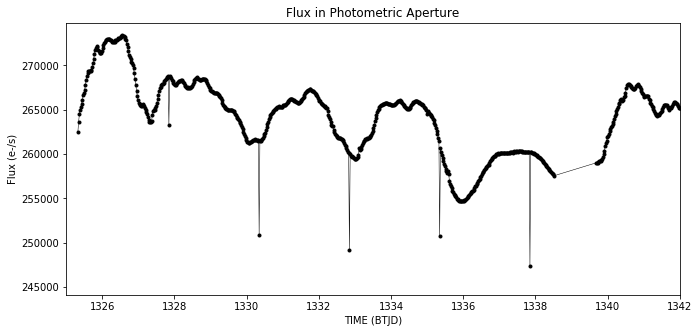

In [0]:
# Use all pixels in our aperture.
aperture = hdu1[2].data == 1

flux1 = make_lc(hdu1[1].data['FLUX'], aperture)
time1 = hdu1[1].data['TIME']

plt.figure(figsize = (11,5))
plt.plot(time1, flux1, 'k.-', lw = .5)
plt.xlim(1325,1342)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Flux (e-/s)')
plt.title('Flux in Photometric Aperture')

Text(0.5, 1.0, 'Background Flux')

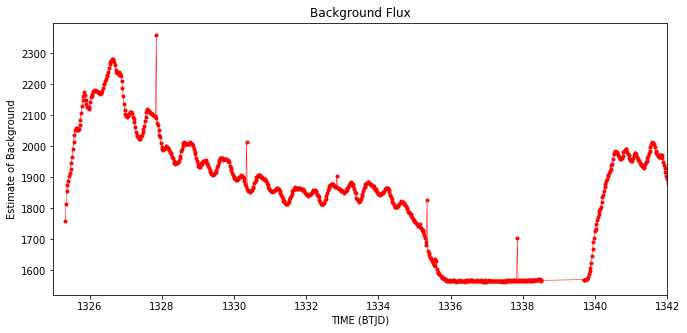

In [0]:
# Plot the flux change of the dimmest pixels by using percentile.
bkgAperture = hdu1[1].data['FLUX'][0] < np.percentile(hdu1[1].data['FLUX'][0], 5)

bkgFlux1 = make_lc(hdu1[1].data['FLUX'], bkgAperture)
time1 = hdu1[1].data['TIME']

plt.figure(figsize = (11, 5))
plt.plot(time1, bkgFlux1, 'r.-', lw = .5)

plt.xlim(1325, 1342)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Estimate of Background')
plt.title('Background Flux')

The flux graph below shows that this planet seems to be in the centre of 1 star only. This is confirmed by the table that we obtained earlier that showed a star in the sector: tess-s0001-3-2

Text(0.5, 1.0, 'Background Subtracted Flux')

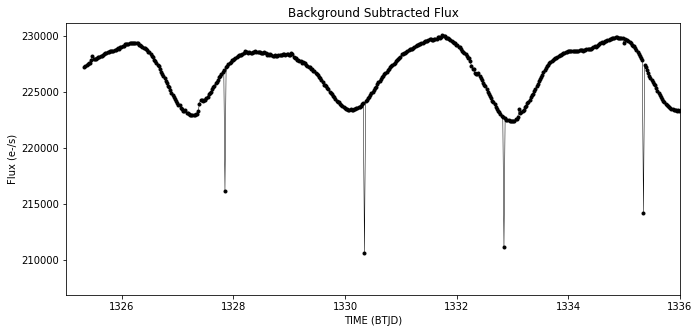

In [0]:
bkgSubFlux = flux1 - (bkgFlux1 * np.sum(aperture) / np.sum(bkgAperture) )

plt.figure(figsize = (11,5))
plt.plot(time1, bkgSubFlux,'.-k', lw = 0.5)

plt.xlim(1325, 1336)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Flux (e-/s)')
plt.title('Background Subtracted Flux')

Now putting together what we did before for HD 1397 and pi Men c, we can construct its light curve:

In [0]:
ticid_new = 410214986
url_1 = dvurl + str(ticid_new) + '/tces/'
param1 = {"tce" : tce}

r1 = requests.get(url = url_1, params = param1, headers = header)
sectorInfo = r1.json()

sectors = [x[:11] for x in sectorInfo["TCE"] if tce in x]
sectors

['s0001-s0001']

In [0]:
url_1 = dvurl + str(ticid_new) + '/info/'
param1 = {"tce" : tce,
            "sector" : sectors[0]}

r1 = requests.get(url = url_1, params = param1, headers = header)
tceInfo = r1.json()
tceInfo.keys()
tceInfo['DV Data Header'].keys()

print("TIC: %s" % tceInfo['DV Primary Header']['OBJECT'])
print("Planet Radius: %f" % tceInfo['DV Data Header']['PRADIUS'])

TIC: TIC 410214986
Planet Radius: 8.254507


In [0]:
url = dvurl + str(ticid_new) + '/table/'
param1 = {"tce" : tce,
            "sector" : sectors[0]}

r1 = requests.get(url = url, params = param1, headers = header)
tce_data = r1.json()

data = p.DataFrame.from_dict(tce_data['data'])
data.columns

Index(['TICID', 'EXTNAME', 'TIME', 'TIMECORR', 'CADENCENO', 'PHASE', 'LC_INIT',
       'LC_INIT_ERR', 'LC_WHITE', 'LC_DETREND', 'MODEL_INIT', 'MODEL_WHITE',
       'DATE_OBS', 'TESSDatetime', 'SECTORS'],
      dtype='object')

Text(0, 0.5, 'Relative Flux')

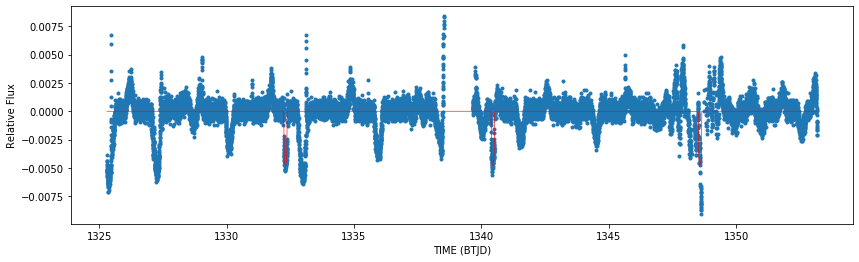

In [0]:
detrend = data['LC_DETREND']
model = data['MODEL_INIT']
time = data['TIME']

plt.figure(figsize=(14,4))
plt.plot(time,detrend,'.',lw=0.4)
plt.plot(time,model,'r-',lw=0.6)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Relative Flux')

In [0]:
url = dvurl + str(ticid_new) + '/phaseplot/'
param1 = {"tce" : tce,
            "sector" : sectors[0]}

r1 = requests.get(url = url, params = param1, headers = header)

display(HTML(str(r1.content.decode('utf-8'))))